In [31]:
# Prepare for the dataset

import os
import librosa, librosa.display
import math
import json
import glob
import matplotlib.pyplot as plt
import numpy as np

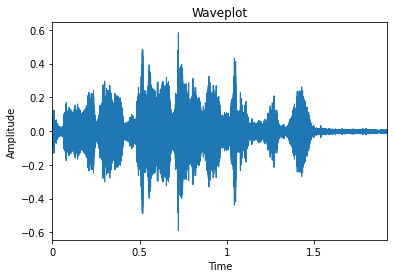

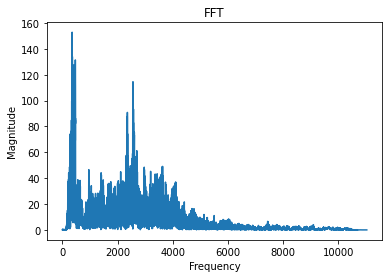

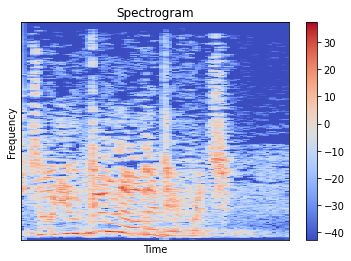

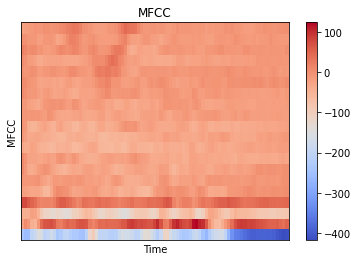

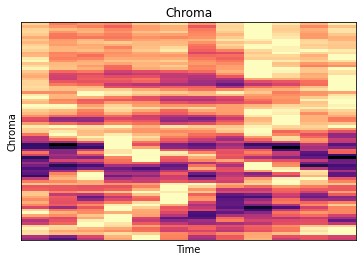

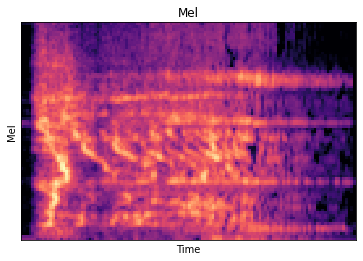

In [32]:
# demo preprocessing 
file = "/content/drive/MyDrive/PRML/Project/raw_wav/angry/angry_05_01_01.wav"

# audio waveplot
signal, sr = librosa.load(file, sr=22050)
librosa.display.waveplot(signal,sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Waveplot")
plt.show()

# fft -> spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))
# plt.plot(frequency,magnitude)
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
# plt.show()

left_frequency = frequency[:int(len(magnitude)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.plot(left_frequency,left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title("FFT")
plt.show()

# stft -> spectrogram
n_fft = 2048  # number of samples per single fft
hop_length = 512 # how many samples the time window shift to the right

stft = librosa.core.stft(signal,n_fft=n_fft,hop_length=hop_length)

spectrogram = np.abs(stft)
log_spectrogram=librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("Spectrogram")
plt.show()

# MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length,n_mfcc=20)
#MFCCs=np.mean(librosa.feature.mfcc(signal, sr=sr, n_mfcc=40).T, axis=0)
librosa.display.specshow(MFCCs,sr=sr,hop_length=hop_length)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.title("MFCC")
plt.show()

# Chroma
chroma = librosa.feature.chroma_stft(S=spectrogram, sr=sr).T
chroma = librosa.amplitude_to_db(chroma)
librosa.display.specshow(chroma)
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.title("Chroma")
plt.show()

# Mel
mel = librosa.feature.melspectrogram(S=spectrogram, sr=sr).T
mel = librosa.amplitude_to_db(mel)
librosa.display.specshow(mel)
plt.xlabel('Time')
plt.ylabel('Mel')
plt.title('Mel')
plt.show()

In [33]:
len(signal)/22050

1.9213151927437642

In [34]:
mel_mean = np.mean(librosa.feature.melspectrogram(S=spectrogram, sr=sr).T,axis=0)
mel_mean.shape

(128,)

In [35]:
MFCCs.shape

(20, 83)

In [36]:
# data preprocessing

SAMPLE_RATE = 22050
DURATION = 1 # Each sample last 3 seconds

DATA_PATH = '/content/drive/MyDrive/PRML/Project/raw_wav'
JSON_PATH = '/content/drive/MyDrive/PRML/Project/dataset_real.json'   

emotion_map={
  '01':'neutral',
  #'02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  #'06':'fearful',
  #'07':'disgust',
  #'08':'surprised'
}

def save_mfcc(dataset_path, json_path, n_mfcc=20, n_fft=2048, hop_length=512):
        
    
  # Dictionary to store the data
  data = {
      'mfcc':[],
      'chroma':[],
      'mel':[],
      'labels':[],
      'emotion':[]
  }
    
  num_expected_sample = SAMPLE_RATE*DURATION

  # Loop through all kinds of emotions
  for file in glob.glob("/content/drive/MyDrive/PRML/Project/raw_wav/*/*.wav"):
    file_name=os.path.basename(file)
    label = file_name.split("_")[1]
    if int(label) in [1,3,4,5]:
      # Load audio files
      signal, sr = librosa.load(file, sr = SAMPLE_RATE)
      if (len(signal) >= num_expected_sample):
        for sample_num in range(0,len(signal),num_expected_sample):
          if num_expected_sample+sample_num <= len(signal):
            signal_cut = signal[sample_num : num_expected_sample+sample_num]
            print(len(signal_cut))
            data['labels'].append(int(label))
            data['emotion'].append(emotion_map[label])

        
            # Process extracting mfcc, chroma, mel and storing data  
            stft = librosa.core.stft(signal_cut,n_fft=n_fft,hop_length=hop_length)
            spectrogram = np.abs(stft)

            mfcc = librosa.feature.mfcc(signal_cut,sr=sr,n_fft=n_fft,n_mfcc=n_mfcc,hop_length=hop_length).T
            chroma = librosa.feature.chroma_stft(S=spectrogram,sr=sr,n_fft=n_fft,hop_length=hop_length).T
            chroma = chroma = librosa.amplitude_to_db(chroma)
            mel = librosa.feature.melspectrogram(S=spectrogram,sr=sr,n_fft=n_fft,hop_length=hop_length).T
            mel = librosa.amplitude_to_db(mel)

            data['mfcc'].append(mfcc.tolist())
            data['chroma'].append(chroma.tolist())
            data['mel'].append(mel.tolist())
            print('{} features extracted'.format(len(data['mfcc'])))

  return data, signal_cut

  
data, signal_cut = save_mfcc(DATA_PATH,JSON_PATH)
with open(JSON_PATH, 'w') as fp:
  json.dump(data, fp, indent=4)

22050
1 features extracted
22050
2 features extracted
22050
3 features extracted
22050
4 features extracted
22050
5 features extracted
22050
6 features extracted
22050
7 features extracted
22050
8 features extracted
22050
9 features extracted
22050
10 features extracted
22050
11 features extracted
22050
12 features extracted
22050
13 features extracted
22050
14 features extracted
22050
15 features extracted
22050
16 features extracted
22050
17 features extracted
22050
18 features extracted
22050
19 features extracted
22050
20 features extracted
22050
21 features extracted
22050
22 features extracted
22050
23 features extracted
22050
24 features extracted
22050
25 features extracted
22050
26 features extracted
22050
27 features extracted
22050
28 features extracted
22050
29 features extracted
22050
30 features extracted
22050
31 features extracted
22050
32 features extracted
22050
33 features extracted
22050
34 features extracted
22050
35 features extracted
22050
36 features extracted
2

In [37]:
# with open(JSON_PATH, 'w') as fp:
#   json.dump(data, fp, indent=4)

In [38]:
print(np.array(data['mfcc']).shape)
print(np.array(data['chroma']).shape)
print(np.array(data['mel']).shape)

(1240, 44, 20)
(1240, 44, 12)
(1240, 44, 128)


In [39]:
mfcc = librosa.feature.mfcc(signal_cut,sr=sr,n_fft=n_fft,n_mfcc=20,hop_length=512).T
mfcc.shape

(44, 20)

In [40]:
np.array(data['mfcc'][200]).shape

(44, 20)